# General approach

Use numpy to generate an exponential graph + noise, x doesn't need to be time format
Use numpy to generate an exponential decay graph + noise
Implement the Autoregressive model in python and pass series



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

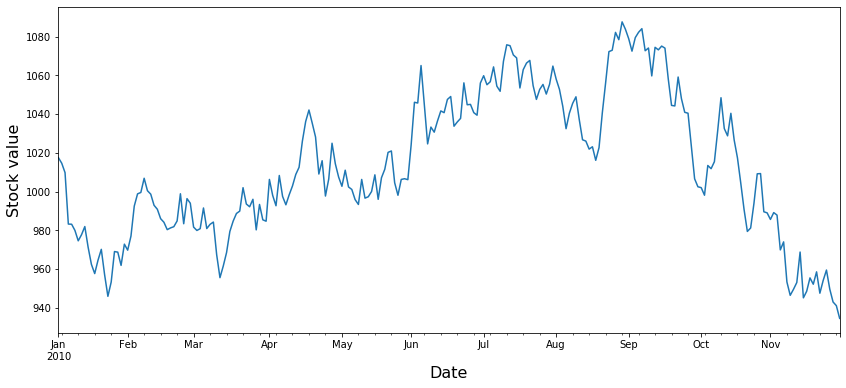

In [45]:
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30', freq='B')

# White noise error term
error = np.random.normal(0, 10, len(dates))

# Define random walk
def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error + 0)
    Y = cum_error + Y_0 
    return Y

shares_value_drift = random_walk(1000, error)

shares_series_drift =  pd.Series(shares_value_drift, index=dates)

ax = shares_series_drift.plot(figsize=(14,6))
ax.set_ylabel('Stock value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show()

In [122]:
def autoregresssion_model(series, constant, phi):
    l = []
    for i, y_t in enumerate(series):
        if i > 0:
            l.append(constant + phi * series[i - 1] + np.random.sample()*(-60/365))
    return pd.Series(data=l, index=series.index[1:])

phi=40


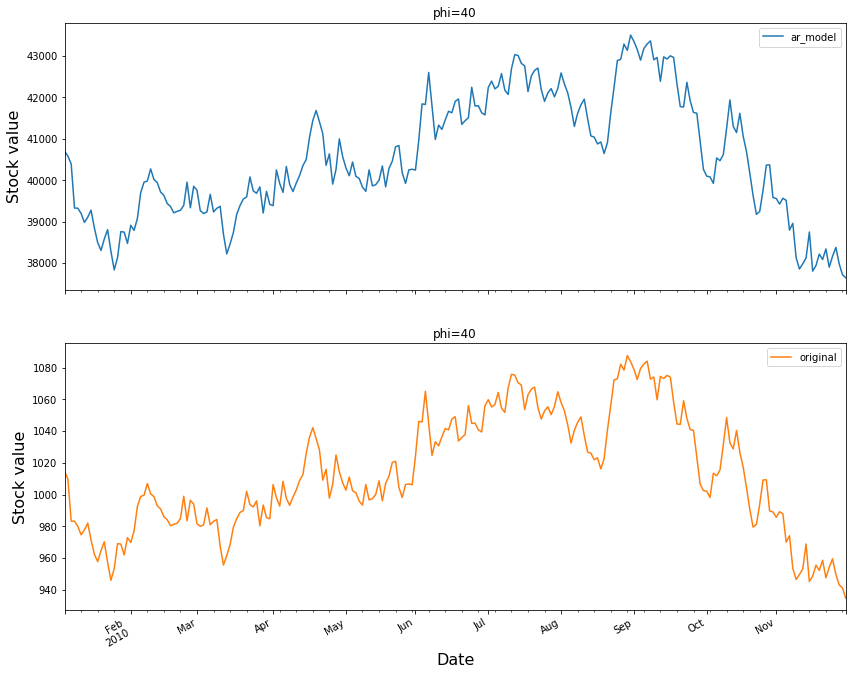

phi=41


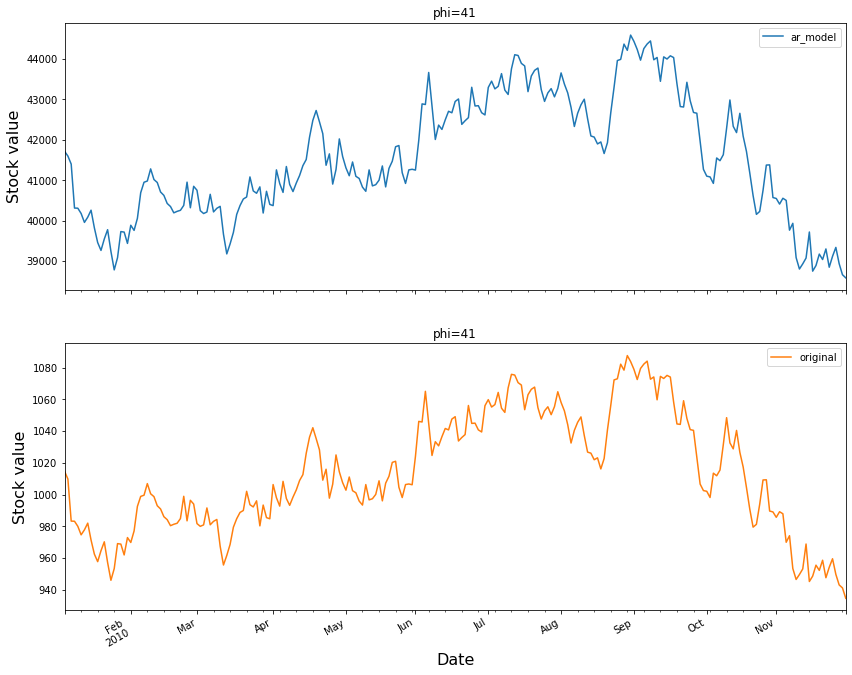

phi=42


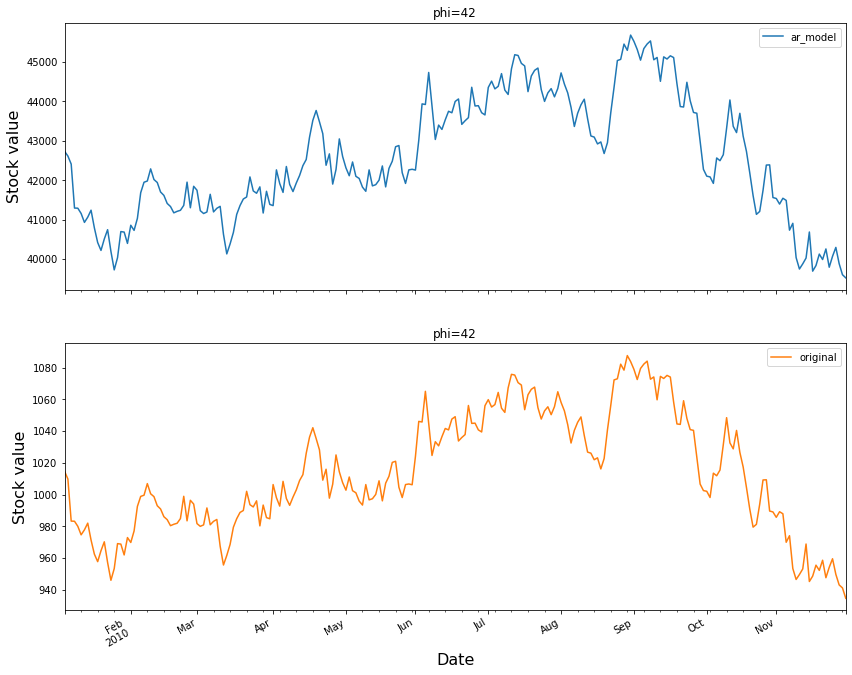

phi=43


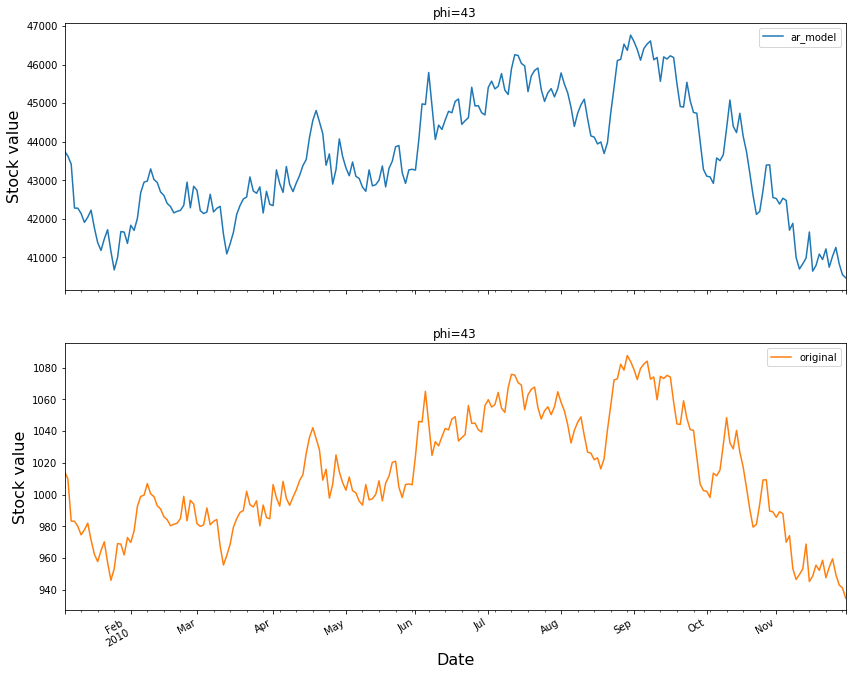

phi=44


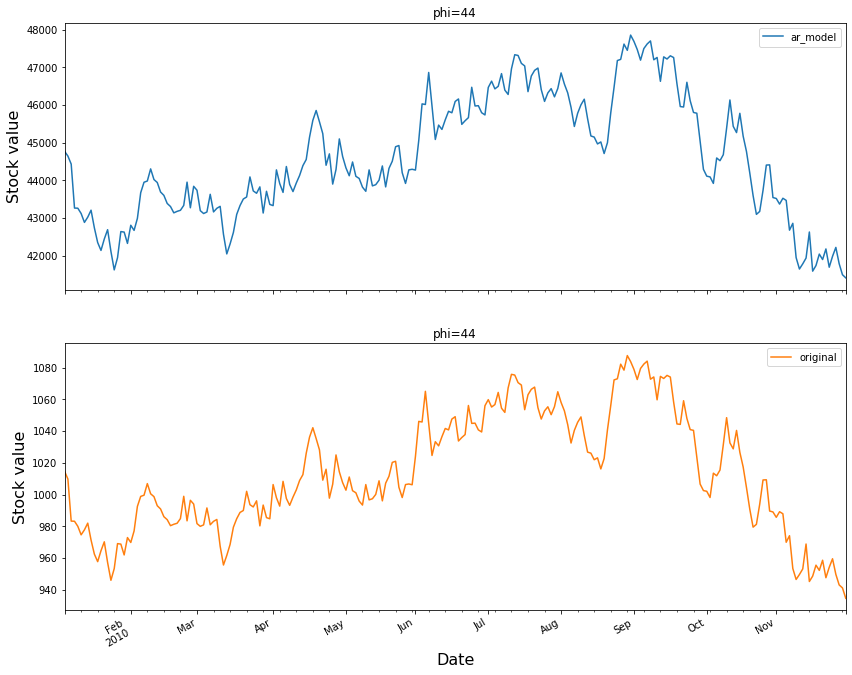

In [126]:


# for i in np.arange(-3, -0.1, .6):
for i in np.arange(40, 45, 1):
    ar_model = autoregresssion_model(shares_series_drift, 0, i)
    plot_df = pd.concat([ar_model, shares_series_drift[1:]], axis=1)
    plot_df.columns = ['ar_model', 'original']

    ax = plot_df.plot(subplots=True, figsize=(14,12))
    ax[0].set_ylabel('Stock value', fontsize=16)
    ax[0].set_xlabel('Date', fontsize=16)
    ax[0].set_title(f'phi={i}')
    ax[1].set_ylabel('Stock value', fontsize=16)
    ax[1].set_xlabel('Date', fontsize=16)
    ax[1].set_title(f'phi={i}')
    print(f'phi={i}')
    plt.show()